# RIYA JINDAL , GRIP JUNE'2021

# DATA SCIENCE AND BUSINESS ANALYTICS : TASK 1

## IMPORTING THE REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

## READING DATA FROM THE GIVEN LINK

In [2]:
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## CALCULATING THE STATISTICAL DATA

In [28]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## CHECKING THE CORRELATION

In [29]:
s_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## CONCISE SUMMARY OF THE DATAFRAME

In [30]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## PLOTTING THE DISTRIBUTION OF SCORES

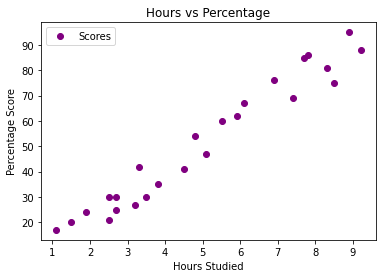

In [31]:
s_data.plot(x='Hours', y='Scores', style='o', color = 'purple')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### FROM THE GRAPH ABOVE, WE CAN NOTICE A VERY CLEAR POSITIVE RELATIONSHIP BETWEEN THE HOURS STUDIED AND PERCENTAGE SCORES.

## PREPARING THE DATA

In [4]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

In [5]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [6]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

#### NOW USING THE SCIKIT - LEARN'S BUILT - IN train_test_split ,WE HAVE SPLITTED THE DATA INTO TRAINING AND TEST SETS. WE HAVE CONSIDERED THE TEST SIZE TO BE 0.2 , WHICH MEANS 80% OF THE DATA IS USED AS TRAINING SET AND REST TO TEST.

In [7]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [16]:
len(X_train)

20

In [17]:
len(X_test)

5

In [19]:
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [24]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

## TRAINING THE ALGORITHM

In [25]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

#### WE HAVE PLOTTED THE TEST DATA AS WELL AS THE REGRESSION LINE

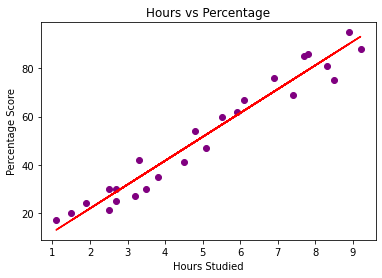

In [27]:
line = regressor.coef_*X+regressor.intercept_

plt.scatter(X, y, color = 'Purple')
plt.plot(X, line, color = 'Red');
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

## MAKING PREDICTIONS

In [10]:
print(X_test)
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


#### NOW, WE ARE COMPARING THE ACTUAL AND THE PREDICTED VALUES

In [11]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### WE CAN SEE THAT THERE IS AN ACCURACY OF 94.5% 

In [26]:
regressor.score(X_test, y_test)

0.9454906892105356

#### TESTING THE MODEL TAKING RANDOM VALUE AS 9.25 

In [12]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


#### USING DIFFERENT METRICS, WE ARE EVALUATING OUR MODEL. WE HAVE CONSIDERED, MEAN ABSOLUTE ERROR AND MEAN SQUARED ERROR.

In [32]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squqred Error:',metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squqred Error: 21.5987693072174


#### TASK 1 COMPLETED